# Экзогенные переменные

## Импорт модулей

In [2]:
import numpy as np
import pandas as pd

from scipy.optimize import minimize

from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.statespace.sarimax import SARIMAX

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline

## Данные

In [6]:
gas = pd.read_csv('data/gas.csv', index_col='Date', parse_dates=True)

In [7]:
gas.head()

,Consumption,Mean temperature
Date,,
2016-01-01,233.59,5.86
2016-01-02,250.99,6.87
2016-01-03,242.07,7.13
2016-01-04,286.05,7.28
2016-01-05,284.71,8.22


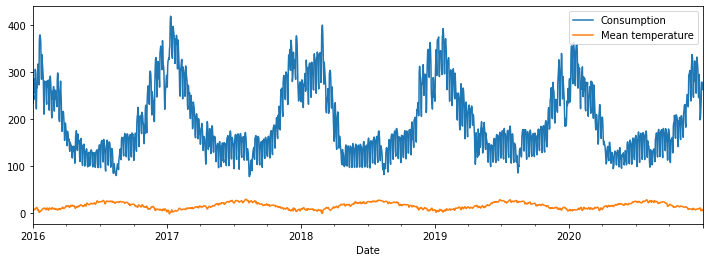

In [10]:
gas.plot(figsize=(12,4))
plt.show()

## Модель

In [18]:
pr = gas["Mean temperature"].groupby([gas.index.month, gas.index.day]).mean()

In [20]:
del pr[2,29]

In [35]:
model = SARIMAX(gas["Consumption"], gas["Mean temperature"],
                order=(3, 1, 1),
                seasonal_order=(2, 1, 1, 7)).fit()

/home/levi/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/levi/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.97868D+00    |proj g|=  5.45670D-02


 This problem is unconstrained.



At iterate    5    f=  3.94862D+00    |proj g|=  1.19670D-01

At iterate   10    f=  3.89290D+00    |proj g|=  2.41684D-02

At iterate   15    f=  3.89217D+00    |proj g|=  8.72383D-03

At iterate   20    f=  3.89029D+00    |proj g|=  2.42940D-03

At iterate   25    f=  3.88981D+00    |proj g|=  5.25923D-03

At iterate   30    f=  3.88875D+00    |proj g|=  1.45306D-03

At iterate   35    f=  3.88874D+00    |proj g|=  5.55486D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     39     42      1     0     0   1.752D-05   3.889D+00
  F =   3.8887385178521443     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

## Прогноз

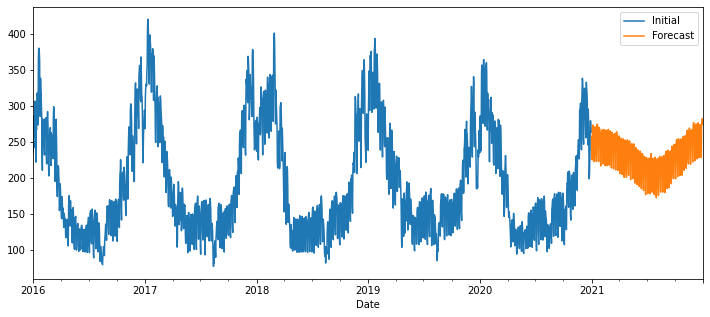

In [43]:
gas["Consumption"].plot(figsize=(12,5))
model.forecast(365, exog=pr).plot()
plt.legend(["Initial", "Forecast"])
plt.show()